In [1]:
from torch.utils.cpp_extension import load

gp_interp_cuda = load(
    'gp_interp_cuda', ['../cuda/gp_interp_cuda.cpp', '../cuda/gp_interp_cuda_kernel.cu'], verbose=True)
# help(gp_interp_cuda)

Using /tmp/torch_extensions as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /tmp/torch_extensions/gp_interp_cuda/build.ninja...
Building extension module gp_interp_cuda...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module gp_interp_cuda...


In [2]:
import sys; sys.path.extend(['.', '../cuda'])

import numpy as np
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms.functional as TVF

from gp_interp import GPInterp

device = 'cuda'
img_pil = Image.open('/tmp/skoroki/datasets/ffhq/thumbnails128x128/00000.png')
img = TVF.to_tensor(img_pil).to(device)
gp = GPInterp(img.shape[1], img.shape[2], img.shape[0], 0.25, 1.0, 5)
gp.to(device)

print('Num coords:', len(gp.means))

print('Doing a forward pass...')
out = gp(img)

print('Doing a backward pass...')
loss = (out - img).abs().mean()
loss.backward()
print('Loss:', loss.item())
print('Success!')

Num coords: 1024
Doing a forward pass...
Doing a backward pass...
Loss: 0.29799744486808777
Success!


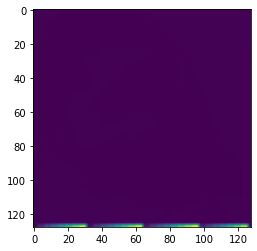

In [15]:
import matplotlib.pyplot as plt

plt.imshow(out[2].detach().cpu())

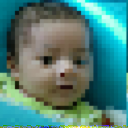

In [4]:
TVF.to_pil_image(out.cpu())